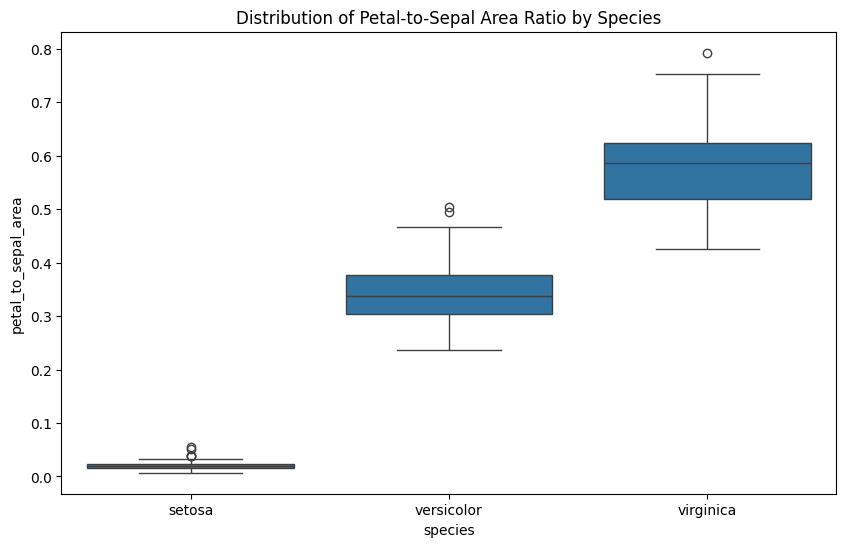

Accuracy without new feature: 1.000
Accuracy with new feature: 0.978
Feature importance of new feature: 0.434


In [1]:
# Title: Feature Engineering for Classification
# Description: Create a new feature that could help distinguish between species based on
# logical assumptions and verify its utility.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Feature Engineering: Create petal area to sepal area ratio
df['petal_to_sepal_area'] = (df['petal length (cm)'] * df['petal width (cm)']) / \
                           (df['sepal length (cm)'] * df['sepal width (cm)'])

# Visualize the new feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_to_sepal_area', data=df)
plt.title('Distribution of Petal-to-Sepal Area Ratio by Species')
plt.show()

# Evaluate feature utility with model performance
X = df.drop('species', axis=1)
y = df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model without new feature
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train[iris.feature_names], y_train)
original_acc = accuracy_score(y_test, model_original.predict(X_test[iris.feature_names]))

# Model with new feature
model_new = RandomForestClassifier(random_state=42)
model_new.fit(X_train, y_train)
new_acc = accuracy_score(y_test, model_new.predict(X_test))

print(f"Accuracy without new feature: {original_acc:.3f}")
print(f"Accuracy with new feature: {new_acc:.3f}")
print(f"Feature importance of new feature: {model_new.feature_importances_[-1]:.3f}")